In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [40]:
data_titanic = pd.read_csv('titanic.csv')
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
clean_titanic = data_titanic.drop(['PassengerId','Name','Ticket','Sex','Cabin','Embarked'],axis=1)
clean_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [42]:
clean_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [43]:
clean_titanic.groupby('Survived').mean()


,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [44]:
clean_titanic.groupby(clean_titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


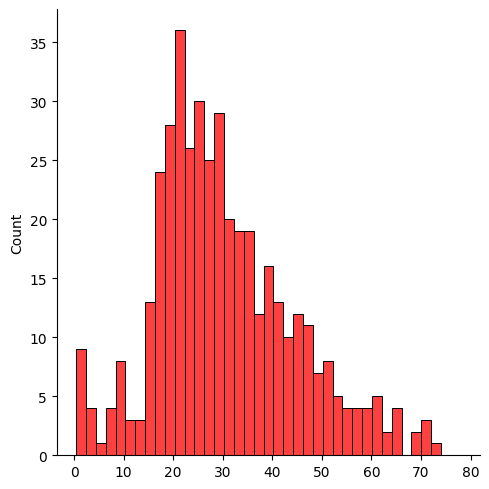

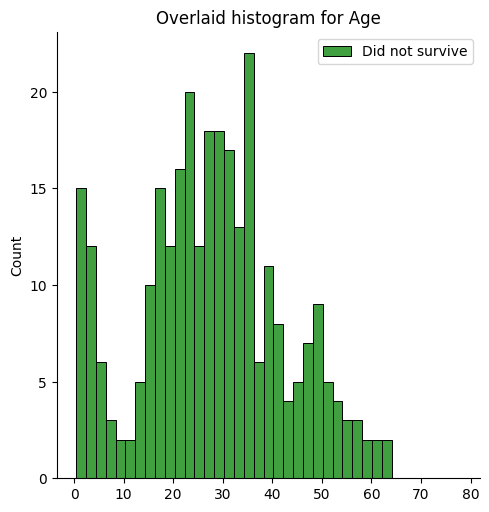

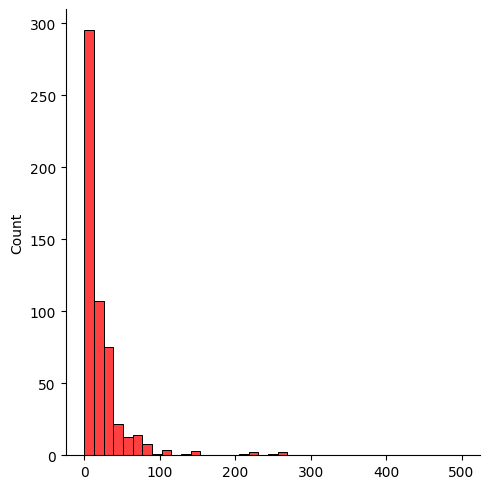

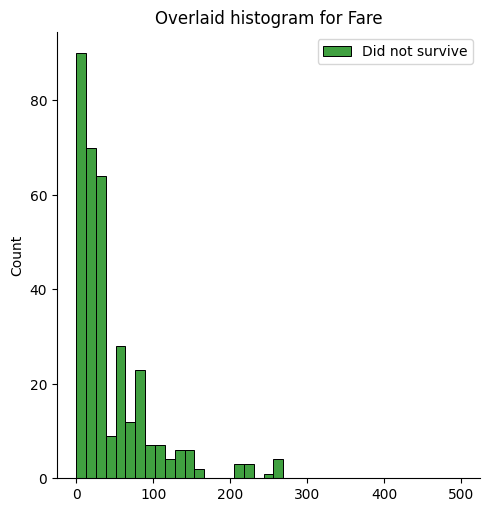

In [45]:
# plot continuos feature
for i in ['Age', 'Fare']:
    died = list(clean_titanic[clean_titanic['Survived'] == 0][i].dropna())
    survived = list(clean_titanic[clean_titanic['Survived'] == 1][i].dropna())
    xmim = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmim) / 40
    sns.displot(died, color='r', kde=False, bins=np.arange(xmim, xmax, width))
    sns.displot(survived, color='g', kde=False, bins=np.arange(xmim, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title(f'Overlaid histogram for {i}')
    plt.show()

<Figure size 640x480 with 0 Axes>

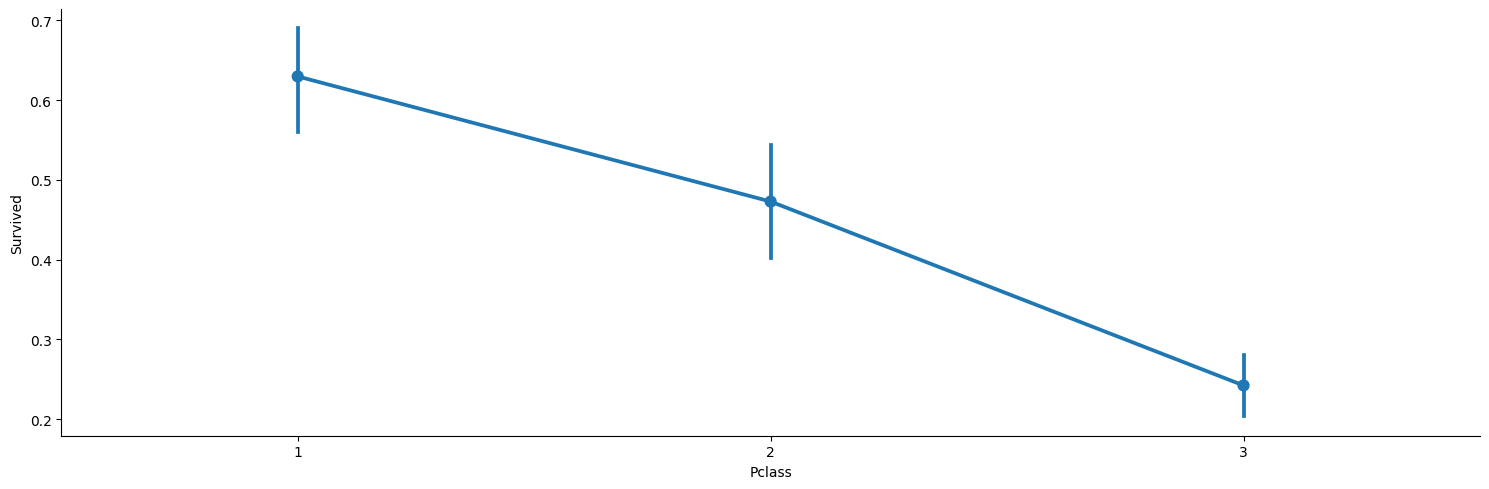

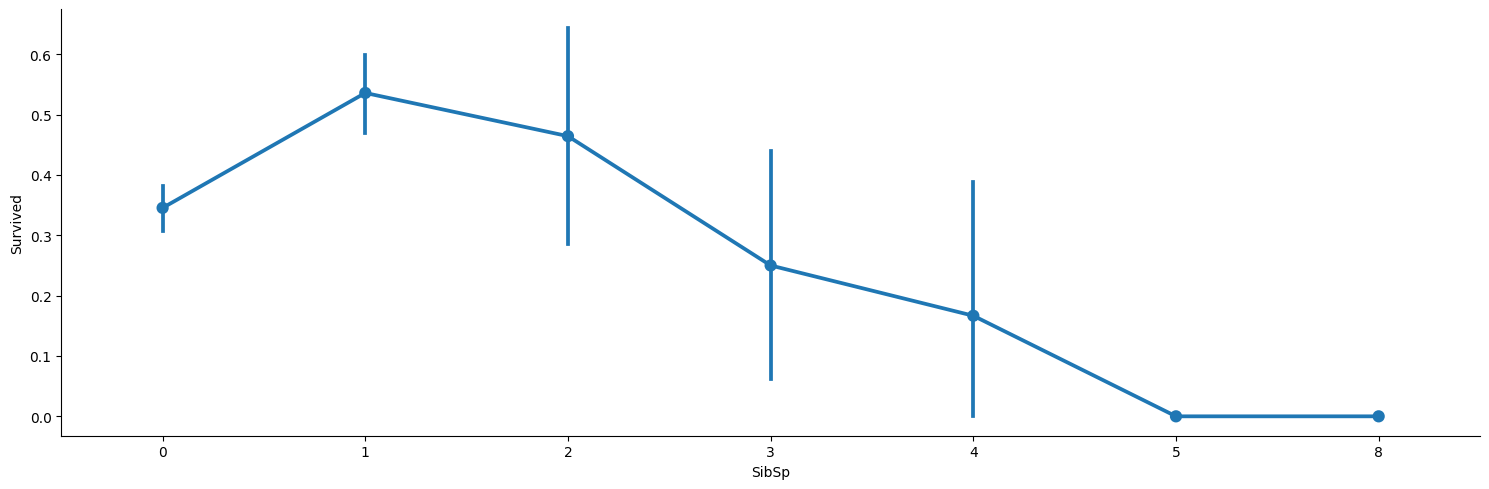

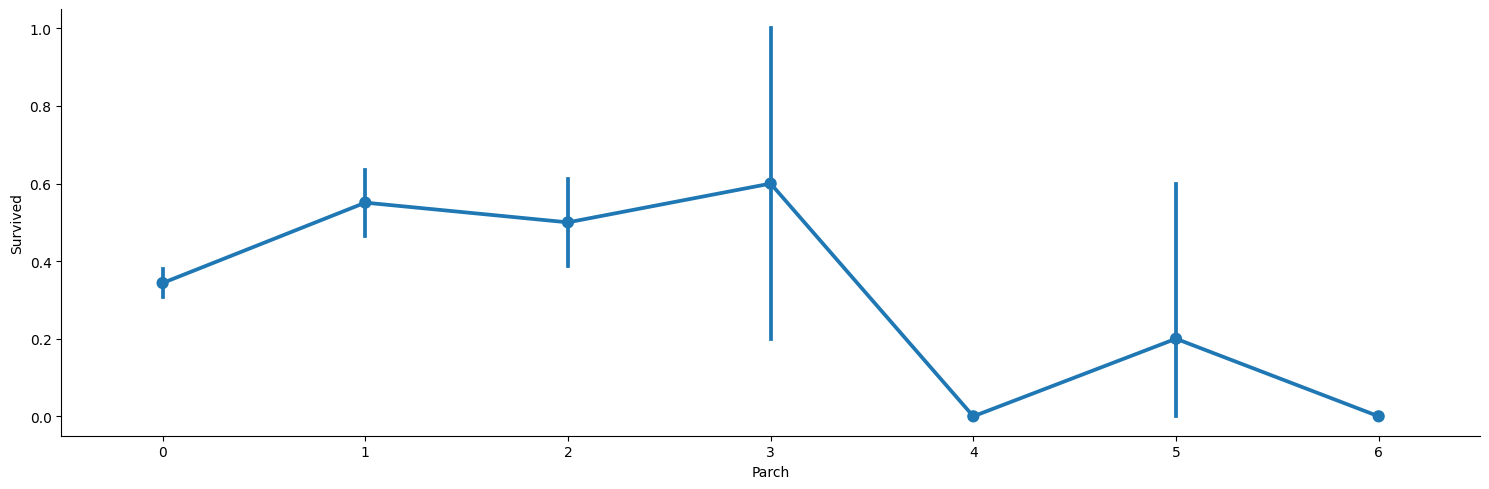

In [56]:
for index, col in enumerate(['Pclass','SibSp','Parch']):
 plt.figure(index)
 sns.catplot(x=col ,y='Survived', data=data_titanic, kind='point', aspect=3)
plt.show() 

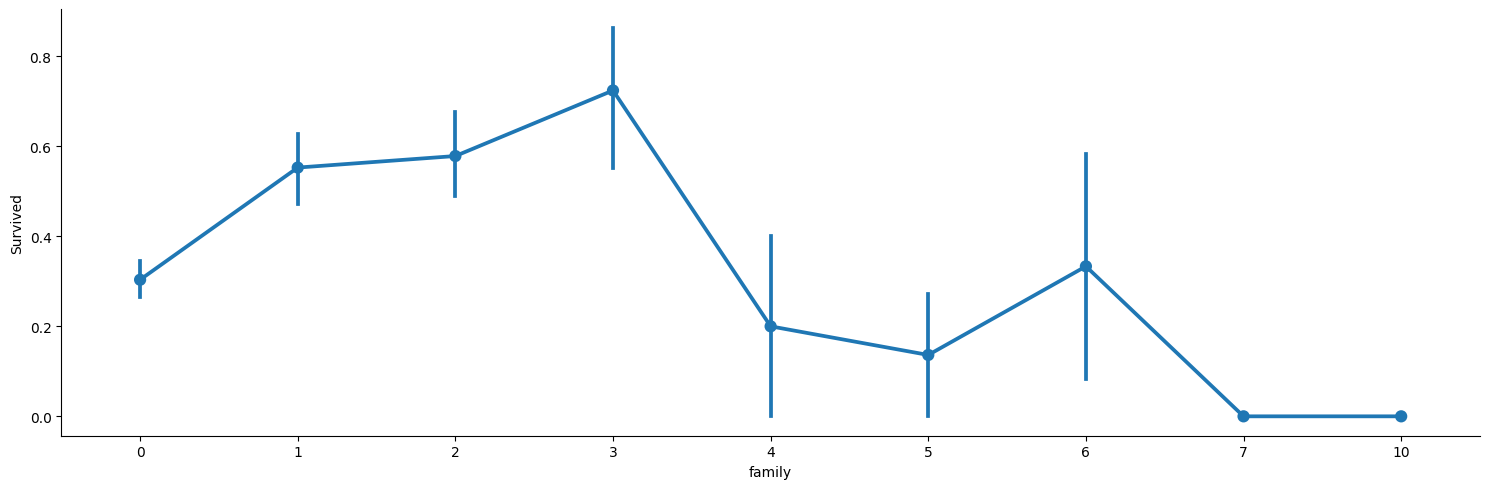

In [55]:
data_titanic['family'] = data_titanic['SibSp'] + data_titanic['Parch']
sns.catplot(x='family', y='Survived', data=data_titanic, kind='point', aspect=3)
plt.show()